In [51]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Conhecimento dos dados e início da análise exploratória
base = pd.read_csv("Credit.csv")
base.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [6]:
base.shape

(1000, 21)

In [7]:
base.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
base.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [15]:
#Tratamento de outliers
base.drop(base.loc[base["credit_amount"] > 10000]. index, inplace = True)
base.describe()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,20.100000,2880.815625,2.995833,2.838542,35.482292,1.407292,1.156250
std,11.274858,2078.657546,1.113002,1.105477,11.353441,0.577425,0.363281
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1344.750000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2236.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3720.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,9960.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [16]:
base.drop(base.loc[base["duration"] > 50]. index, inplace = True)
base.drop(base.loc[base["credit_amount"] > 7000]. index, inplace = True)
base.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,18.806958,2481.848485,3.043771,2.836139,35.398429,1.402918,1.152637
std,9.962333,1541.754630,1.100201,1.104677,11.375785,0.575094,0.359840
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1300.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2069.000000,4.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3379.000000,4.000000,4.000000,41.000000,2.000000,1.000000
max,48.000000,6999.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [18]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         891 non-null    object
 1   duration                891 non-null    int64 
 2   credit_history          891 non-null    object
 3   purpose                 891 non-null    object
 4   credit_amount           891 non-null    int64 
 5   savings_status          891 non-null    object
 6   employment              891 non-null    object
 7   installment_commitment  891 non-null    int64 
 8   personal_status         891 non-null    object
 9   other_parties           891 non-null    object
 10  residence_since         891 non-null    int64 
 11  property_magnitude      891 non-null    object
 12  age                     891 non-null    int64 
 13  other_payment_plans     891 non-null    object
 14  housing                 891 non-null    object
 15  existing_cr

In [20]:
#Criação de faixa de idade
idade_bins = [0,30,40,50,60,80]
idade_categoria = ["Até 30 anos", "De 31 a 40", "De 41 a 50", "De 51 a 60", "Acima de 60"]
base["Faixa Etária"] = pd.cut(base["age"], idade_bins, labels = idade_categoria)
base["Faixa Etária"].value_counts()

Faixa Etária
Até 30 anos    368
De 31 a 40     284
De 41 a 50     140
De 51 a 60      59
Acima de 60     40
Name: count, dtype: int64

In [21]:
base.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Faixa Etária
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,67,none,own,2,skilled,1,yes,yes,good,Acima de 60
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,22,none,own,1,skilled,1,none,yes,bad,Até 30 anos
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,49,none,own,1,'unskilled resident',2,none,yes,good,De 41 a 50
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,53,none,'for free',2,skilled,2,none,yes,bad,De 51 a 60
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,53,none,own,1,skilled,1,none,yes,good,De 51 a 60


In [22]:
base.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         891 non-null    object  
 1   duration                891 non-null    int64   
 2   credit_history          891 non-null    object  
 3   purpose                 891 non-null    object  
 4   credit_amount           891 non-null    int64   
 5   savings_status          891 non-null    object  
 6   employment              891 non-null    object  
 7   installment_commitment  891 non-null    int64   
 8   personal_status         891 non-null    object  
 9   other_parties           891 non-null    object  
 10  residence_since         891 non-null    int64   
 11  property_magnitude      891 non-null    object  
 12  age                     891 non-null    int64   
 13  other_payment_plans     891 non-null    object  
 14  housing                 891 non

In [153]:
#Pré-processamento dos dados
lb = LabelEncoder()
base['checking_status'] = lb.fit_transform(base['checking_status'])
base['credit_history'] = lb.fit_transform(base['credit_history'])
base['purpose'] = lb.fit_transform(base["purpose"])
base['savings_status'] = lb.fit_transform(base["savings_status"])
base['employment'] = lb.fit_transform(base["employment"])
base['personal_status'] = lb.fit_transform(base["personal_status"])
base['other_parties'] = lb.fit_transform(base["other_parties"])
base['property_magnitude'] = lb.fit_transform(base["property_magnitude"])
base['other_payment_plans'] = lb.fit_transform(base["other_payment_plans"])
base['job'] = lb.fit_transform(base["job"])
base['own_telephone'] = lb.fit_transform(base["own_telephone"])
base['foreign_worker'] = lb.fit_transform(base["foreign_worker"])
base['Faixa Etária'] = lb.fit_transform(base["Faixa Etária"])
base['class'] = lb.fit_transform(base["class"])
base['housing'] = lb.fit_transform(base["housing"])



base.dropna(inplace = True)

In [155]:
base.head(20)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Faixa Etária
0,2,6,1,7,1169,0,3,4,3,2,...,67,1,1,2,3,1,1,1,1,0
1,1,48,3,7,5951,3,0,2,0,2,...,22,1,1,1,3,1,0,1,0,1
2,0,12,1,4,2096,3,1,2,3,2,...,49,1,1,1,2,2,0,1,1,3
4,2,24,2,1,4870,3,0,3,3,2,...,53,1,0,2,3,2,0,1,0,4
6,0,24,3,5,2835,2,3,3,3,2,...,53,1,1,1,3,1,0,1,1,4
7,1,36,3,2,6948,3,0,2,3,2,...,35,1,2,1,0,1,1,1,1,2
8,0,12,3,7,3059,4,1,2,1,2,...,61,1,1,1,2,1,0,1,1,0
9,1,30,1,1,5234,3,4,4,2,2,...,28,1,1,2,0,1,0,1,0,1
10,1,12,3,1,1295,3,2,3,0,2,...,25,1,2,1,3,1,0,1,0,1
11,2,48,3,3,4308,3,2,3,0,2,...,24,1,2,1,3,1,0,1,0,1


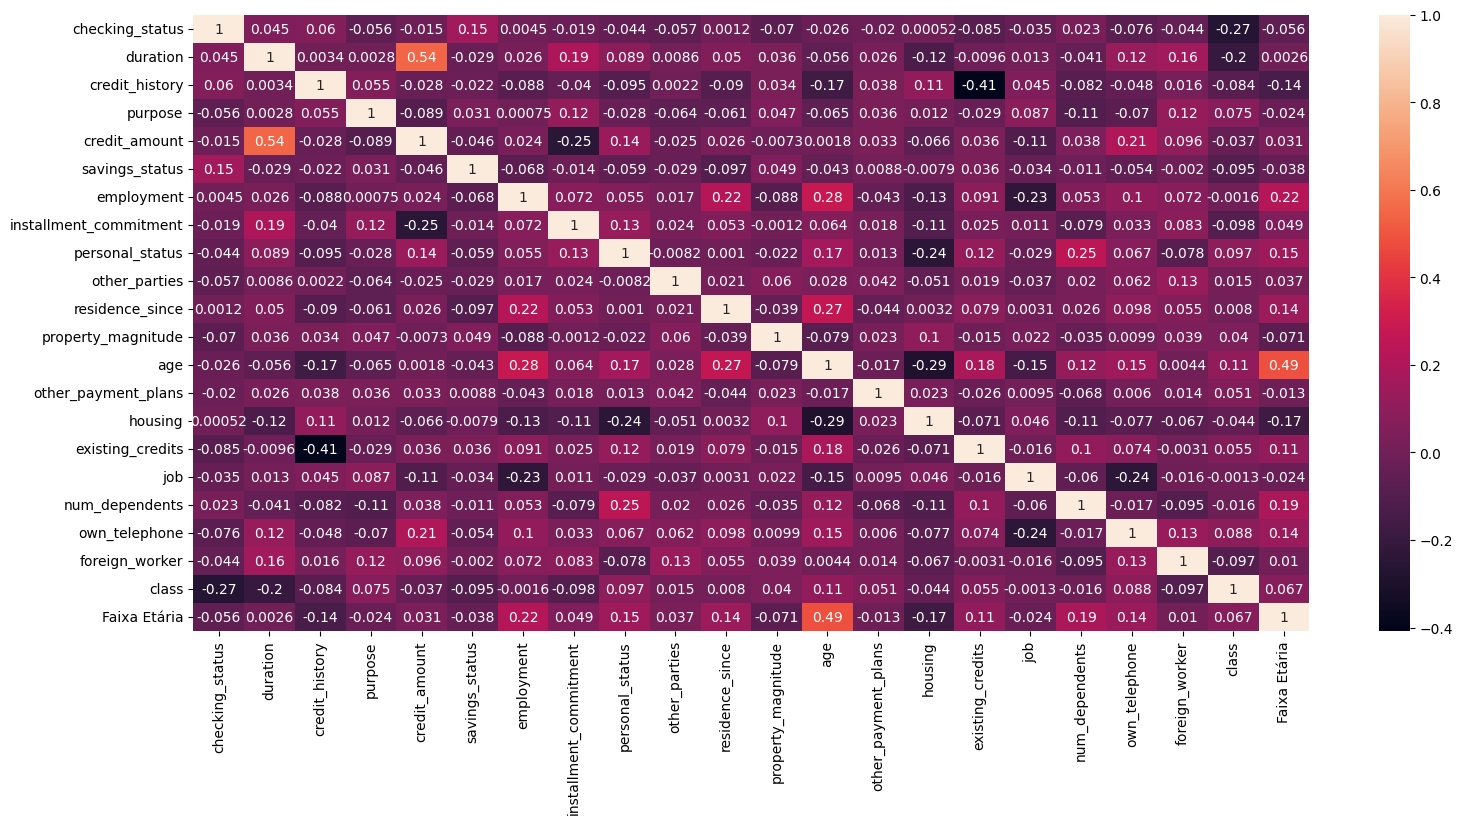

In [29]:
#Visualização das correlações entre a variável alvo ('class') e as outras variáveis
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(base.corr(), annot = True)

In [156]:
#Seleção dos atributos
base2 = base[['checking_status', 'duration', 'installment_commitment', 'personal_status', 'age', 'own_telephone', 'foreign_worker', 'class']]
base2.head()

,checking_status,duration,installment_commitment,personal_status,age,own_telephone,foreign_worker,class
0,2,6,4,3,67,1,1,1
1,1,48,2,0,22,0,1,0
2,0,12,2,3,49,0,1,1
4,2,24,3,3,53,0,1,0
6,0,24,3,3,53,0,1,1


In [157]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         891 non-null    int64
 1   duration                891 non-null    int64
 2   installment_commitment  891 non-null    int64
 3   personal_status         891 non-null    int64
 4   age                     891 non-null    int64
 5   own_telephone           891 non-null    int64
 6   foreign_worker          891 non-null    int64
 7   class                   891 non-null    int64
dtypes: int64(8)
memory usage: 62.6 KB


In [34]:
#Separação do Target com seleção de atributos
target = base2.iloc[:, 7:8]
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [158]:
#Separação das preditoras com seleção de atributos
preditoras = base2.copy()
del preditoras['class']
preditoras.head()

,checking_status,duration,installment_commitment,personal_status,age,own_telephone,foreign_worker
0,2,6,4,3,67,1,1
1,1,48,2,0,22,0,1
2,0,12,2,3,49,0,1
4,2,24,3,3,53,0,1
6,0,24,3,3,53,0,1


In [159]:
#Primeiro teste de modelo (DecisionTree com Seleção de Atributos)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras, target, test_size= 0.3)

In [160]:
modelo = DecisionTreeClassifier()
modelo.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [161]:
previsoes = modelo.predict(X_teste)
previsoes

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [162]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.6604477611940298

In [40]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         891 non-null    int64
 1   duration                891 non-null    int64
 2   credit_history          891 non-null    int64
 3   purpose                 891 non-null    int64
 4   credit_amount           891 non-null    int64
 5   savings_status          891 non-null    int64
 6   employment              891 non-null    int64
 7   installment_commitment  891 non-null    int64
 8   personal_status         891 non-null    int64
 9   other_parties           891 non-null    int64
 10  residence_since         891 non-null    int64
 11  property_magnitude      891 non-null    int64
 12  age                     891 non-null    int64
 13  other_payment_plans     891 non-null    int64
 14  housing                 891 non-null    int32
 15  existing_credits        891 

In [41]:
#Separação do Target sem seleção de atributos
target2 = base.iloc[:,20:21]
target2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [43]:
#Separação das preditoras sem seleção de atributos
preditoras2 = base.copy()
del preditoras2['class']
preditoras2.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,Faixa Etária
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,0
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,1
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,3
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,4
6,0,24,3,5,2835,2,3,3,3,2,...,0,53,1,1,1,3,1,0,1,4


In [70]:
#Segundo teste de modelo (DecisionTree sem seleção de atributos)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras2, target2, test_size= 0.3)

In [72]:
modelo2 = DecisionTreeClassifier()
modelo2.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [73]:
previsoes2 = modelo2.predict(X_teste)
previsoes2

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [74]:
taxa_acerto2 = accuracy_score(y_teste, previsoes2)
taxa_acerto2

0.667910447761194

MODELO COM MELHOR DESEMPENHO


In [163]:
#Terceiro teste de modelo (NaiveBayes com seleção de atributos)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras, target, test_size= 0.3)

In [164]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

C:\Users\joaox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [165]:
# 1 - Good   2- Bad
previsoes3 = naive_bayes.predict(X_teste)
previsoes3

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [166]:
taxa_acerto3 = accuracy_score(y_teste, previsoes3)
taxa_acerto3

0.7089552238805971

In [103]:
#Quarto teste de modelo (NaiveBayes sem seleção de atributo)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(preditoras2, target2, test_size= 0.3)

In [113]:
naive_bayes2 = GaussianNB()
naive_bayes2.fit(X_treinamento, y_treinamento)

C:\Users\joaox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [114]:
previsoes4 = naive_bayes2.predict(X_teste)

In [115]:
taxa_acerto4 = accuracy_score(y_teste, previsoes4)
taxa_acerto4

0.6753731343283582